In [1]:
#
#  Impressively, as complex as the tip data is, it seems to be very much amenable to
#  mixture models. In our analysis of the dependence of geographic position on the tip
#  distribution, we have taken the mean of the tip distribution as a summary statistic.
#  This choice hides a large number of details, such as variances, which may or may 
#  not be important to taxi drivers in developing strategies to achieve larger tips.
#  Here, I explore these details.
#
#  I consider the tip distribution as a four-component mixture model:
#   1. Non-tippers
#   2. Bad tippers
#   3. Decent tippers
#   4. Good tippers
#
#  Although a KS test is able to distinguish between the empirical distribution
#  and the fitted mixture model, it does not do so at super high confidence and a visual
#  comparison shows quite close agreement. This suggests we could apply mixture models 
#  to more completely summarize the difference between the tip distributions as a 
#  function of location.
#

In [11]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 10)
from matplotlib import pyplot as plt

from sklearn.mixture import GaussianMixture
from scipy import stats

import pandas as pd
import numpy as np

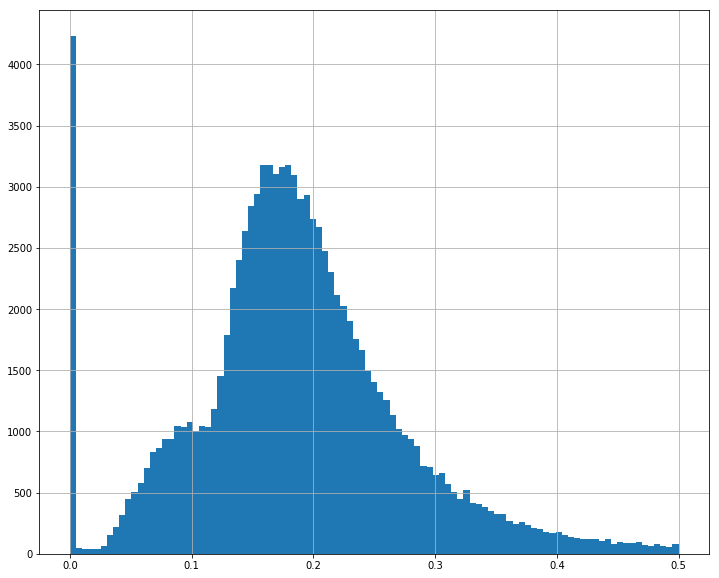

In [25]:
# read in trip data
yellow = pd.read_csv('tripdata_2017-06_PROCESSED.csv')

# for this exploritory analysis, we consider just one arbitrarily chosen location
yellow[yellow.PULocationID == 246]['normalized_tip_time'].hist(bins=np.linspace(0, 0.5, 100))

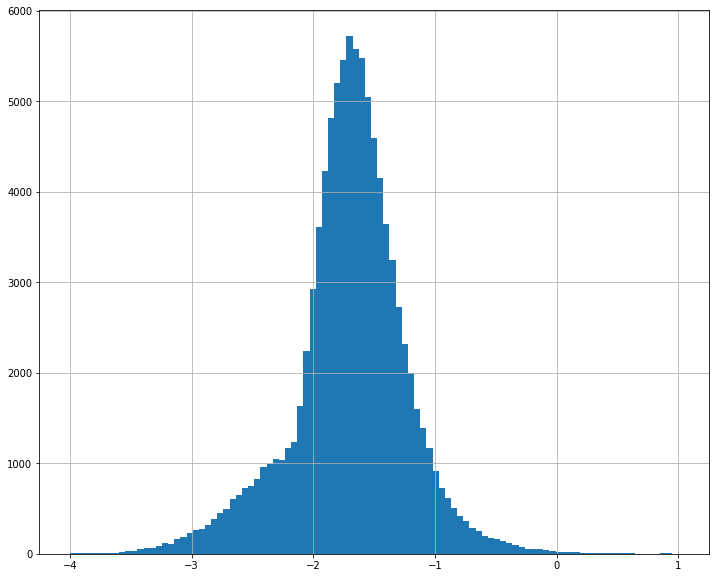

In [26]:
# remove non-tippers, transform to log space 
data = yellow[yellow.PULocationID == 246]['normalized_tip_time']
data = np.log(data[data > 0.01])
plt.hist(data, bins=np.linspace(-4, 1, 100))
plt.grid()

In [27]:
# fit remaining data to 3-component mixture model
clf = GaussianMixture(n_components=3)
clf.fit(np.array([data.values]).T)
print(clf.weights_)
print(clf.means_)
print(clf.covariances_)
print(clf.converged_)

[0.26854401 0.14816948 0.58328651]
[[-1.34830509]
 [-2.40285292]
 [-1.68641345]]
[[[0.20559884]]

 [[0.20658802]]

 [[0.05944276]]]
True


/home/privitera/education/env3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


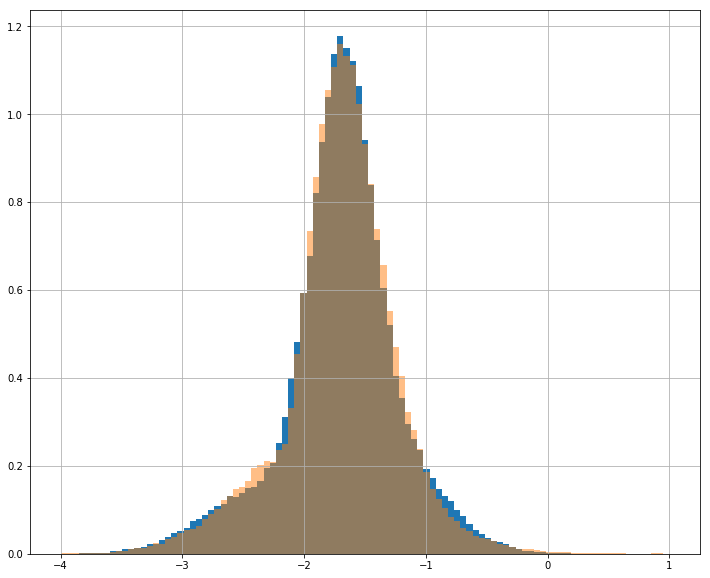

In [28]:
# compare fitted distribution to empirical one
samples = clf.sample(len(data))[0]
plt.hist(samples, bins=np.linspace(-4, 1, 100), normed=True)
plt.hist(data.values, bins=np.linspace(-4, 1, 100), normed=True, alpha=0.5)
plt.grid()

In [29]:
# compute KS statistic
stats.ks_2samp(samples[:, 0], data.values)

Ks_2sampResult(statistic=0.009886398526251172, pvalue=0.00014089023046313175)